# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, finally got moon fit to work, it is rather prone to flat-plateau gradient problems.
2018-0321| CEF, major revision.
2018-0323| CEF, minor updated and spell checked.
2019-1002| CEF, updated for ITMAL E19.

## Multi-layers Perceptrons (MLP)

By stacking up neurons in layers we can create an MLP.

<img src="https://itundervisning.ase.au.dk/E19_itmal/L06/Figs/mlpfully_simple.png" style="width:400px">
<small><em>
    <center>An example of a fully-connected three-layer MLP.</center> 
</xsmall></center>
</em></small>


## Keras Multi-Layer Perceptrons: the `Sequential` model

In this exercise well will try to build fully-connected MLP, via the `keras` API.  Once Keras is installed (good luck), you can use it as front-end to Tensorflow and its highly optimized MLP implementations.

In Keras-terms an MLP is a `Sequential` model. This model can be made out of fully-connected, or in Keras terms `Dense`, layers. Later we see other types of layers that are not fully-connected, like convolutional 2D layers, Conv2D.

OPTIONAL: more info on Keras' `Sequential` model

> https://keras.io/getting-started/sequential-model-guide/

## Keras Multi-Layer Perceptrons on Moon-data

Below are some cells for running a Keras `Sequential` model on the moon-data.

The first cell setup the keras model, load the data and initiates the fit.

The second and third cell plots various aspects of the training, using the _history_ from the Keras model.

Now, many Keras functions are not as well documented compared to Scikit-learn and even though many elements seem to be equal in the Keras and Sckikit-learn domain, they are not 100% equal, for example, Keras comes with some metrics like

> `categorical_accuracy` and `binary_accuracy`

but has no `F1` or `precision` or `recall`.

### Qa Using a Keras MLP on the Moon-data

Run the three cells below, and inspect the plots. I get an accuracy of 0.96 using the setup below.

Now, change the optimizer from `Adam` to our well-known `SDG` method, using

> `optimizer = SGD(lr=0.1)`

instead of `ADAM(lr=0.1)`.

Does it still produce a good score, in form of the `categorical_accuracy`? My accuracy now drops to 0.88, and the new decision boundary looks like a straight line!

Find a way to make the `SDG` produce a result similar to the `ADAM` optimizer: Maybe you need to crack up the number of `EPOCHS` during training to get a better result using the `SGD` optimizer? 

In [1]:
# TODO: Qa..run Keras on Moon, cell 1

#from libitmal import kernelfuns as itmalkernelfuns
#itmalkernelfuns.EnableGPU()                              
#itmalkernelfuns.DisableGPU()   

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
from time import time

np.random.seed(42)

# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))

#optimizer = SGD(lr=0.1)
optimizer = Adam(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(n_samples=2000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 35

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
OK, training time=9.5


Training time: 9.5 sec
Test loss:     0.09610129699110985
Test accuracy: 0.965
All scores in history: [0.09610129699110985, 0.965, 0.026954758477707706, 0.05500482305884361]


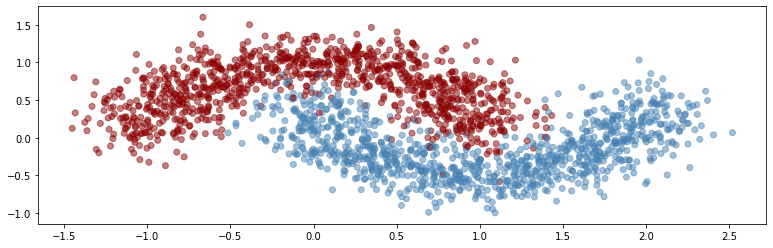

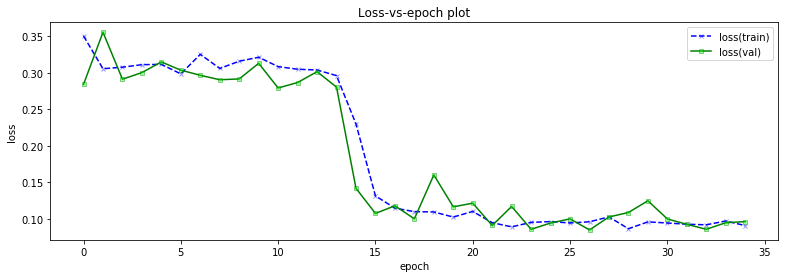

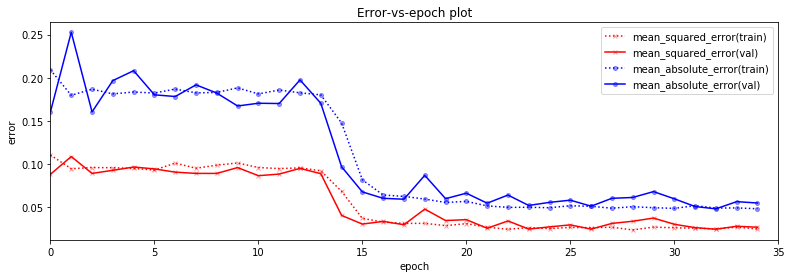

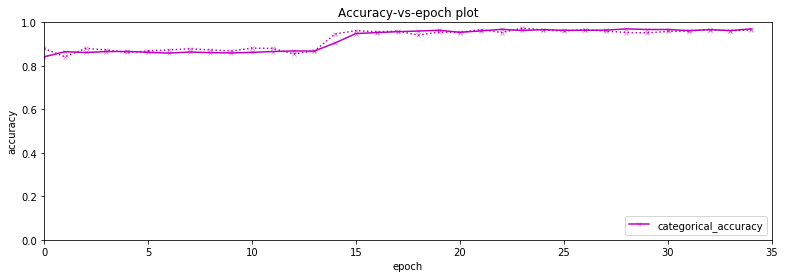

In [2]:
# TODO: Qa..run Keras on Moon, cell 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

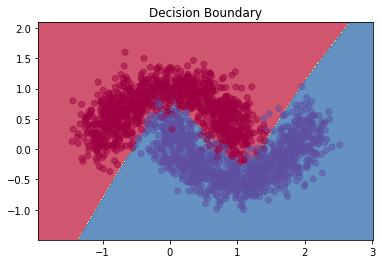

In [3]:
# TODO: Qa..run Keras on Moon, cell 3

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

### Qb  Keras and Classification Categories

It is customary practice to convert both binary and multiclass classification labels to a one-hot encoding. 

Explain one-hot encoding and the 

```python
y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
```

Why use one-hot encoding, and when? 

### Qb Anwser 

One hot coding reference a pratical indexing of a ML algorithm that focuses on clasifications. The training data for clasification problems presents a rather complex problem for the algorithm as the computer cant analyse the relationship between categories if the data isnt labeled. Integer encoding gives the ML algorithm a lot of data to make calculation and base a prediction upon, however it doesn't express the difference between the data.  

##### One-hot categorization 

The one-hot labeling consist of an extra layer of the categorization that labeles each of the different categories possible for categorization. The ML algorithm will then understand a connection between different categories and will be able to make a better prediction, based on the values calulated under categories.

##### When should you use it?

One-hot encoding is best when you have a dataset consisting of a classification issue that cant be respresented by numerical values. The one-hot gives an extra layer of information to your model which can help greatly reduce loss and increase accuarcy. 



#### A side note on Keras and metrics

The metrics in Keras are using Tensorflow function internally and can be difficult to work with compared to what we know from Scikit-lean. You can get the accuracy from Keras adding it to the metrics list like

```python
metrics=['categorical_accurac### Qb  Keras and Classification Categories

It is customary practice to convert both binary and multiclass classification labels to a one-hot encoding. 

Explain one-hot encoding and the 

```python
y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
```

Why use one-hot encoding, and when? y',..
```

Also note that Keras'  `categorical_accuracy` is implemented as
```
def categorical_accuracy(y_true, y_pred):
    return K.cast(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)), K.floatx())

```
and from this you get a result as a TensorFlow tensor type like
```python
y_pred_test_binary = model.predict_classes(X_test)
acc = keras.metrics.categorical_accuracy(y_test_binary, y_pred_test_binary)
print(acc)
```
that prints
````
Tensor("Cast_1:0", shape=(600,), dtype=float32)
```
instead of `numpy.arrays` types, and these TF-types are difficult to work with directly.

### Qc Optimize the Keras Model

Now, try to optimize the model by 

* increasing/decreasing the number of epochs,
* adding more neurons per layer, 
* adding whole new layers,
* changing the activation functions in the layers,
* changing the output activation from `activation="softmax"` to something else,

Comment on your changes, and relate the resulting accuracy, accuracy-vs-epochs, loss-vs-epoch and decision boundary plots to your changes, ie. try to get a feeling of what happens when you modify the model hyperparameters. 

NOTE: Many times the model seems to get stuck on an extreme flat loss plateau, and the decision boundary displays just a 'dum' straight line through the moons!

OPTIONAL: should the moon data be standardized or normalized to say range [-1;1] in both $\mathbf x$-dimensions? Will it help, or is the data OK as-is?

------------- Original Layer Model -------------
Training time: 8.1 sec
Test loss:     0.13596075440446537
Test accuracy: 0.945


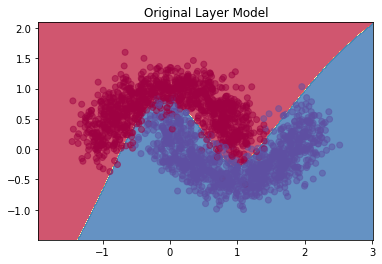

-------------More Epochs Test-------------
------------- Epochs 10 -------------
Training time: 6.5 sec
Test loss:     0.1047293417652448
Test accuracy: 0.9599999992052713


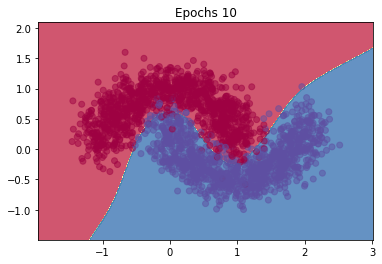

------------- Epochs 50 -------------
Training time: 10.3 sec
Test loss:     0.08699156935016314
Test accuracy: 0.9733333333333334


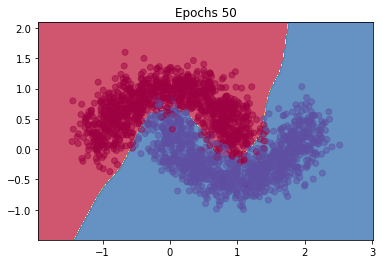

------------- Epochs 120 -------------
Training time: 17.5 sec
Test loss:     0.08813292068739732
Test accuracy: 0.9683333333333334


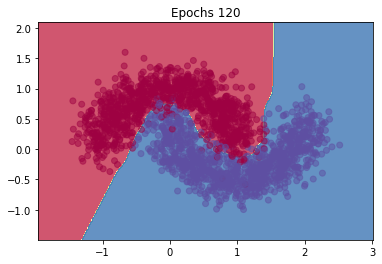

-------------More Neurons Test-------------
------------- 32 Neurons Tanh Layer Model -------------
Training time: 7.6 sec
Test loss:     0.09727926805615425
Test accuracy: 0.9583333333333334


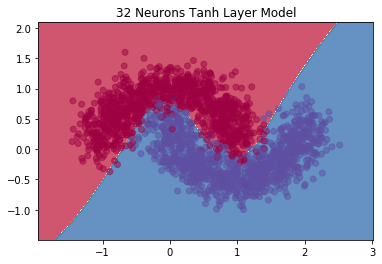

------------- 32 Neurons Sigmoid Layer Model -------------
Training time: 8.3 sec
Test loss:     0.08820118829607963
Test accuracy: 0.9716666666666667


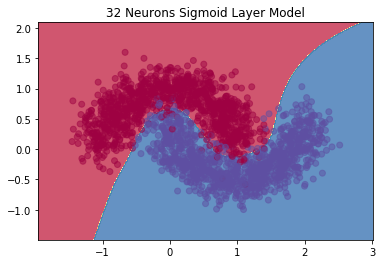

------------- 124 Neurons Tanh Layer Model -------------
Training time: 9.4 sec
Test loss:     0.20322514531222016
Test accuracy: 0.9649999992052714


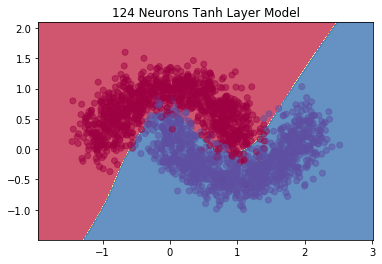

------------- 124 Neurons Sigmoid Layer Model -------------
Training time: 8.7 sec
Test loss:     0.08800737654169401
Test accuracy: 0.965


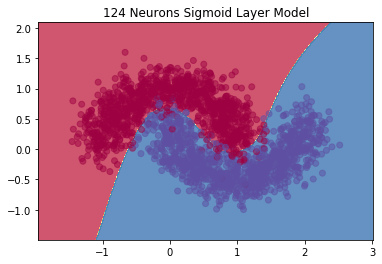

-------------More Layers Test-------------
------------- Extra Tanh Layer Model -------------
Training time: 10.5 sec
Test loss:     0.1347662645081679
Test accuracy: 0.9666666666666667


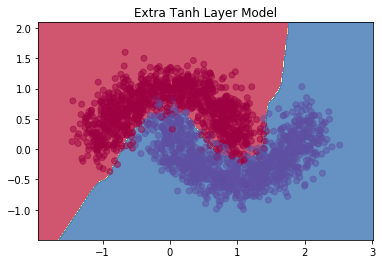

------------- Tanh and Sigmoid Layer  Model -------------
Training time: 9.3 sec
Test loss:     0.12470837116241455
Test accuracy: 0.9616666666666667


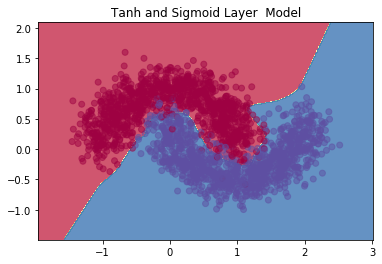

------------- Extra Sigmoid Layer Model -------------
Training time: 12.3 sec
Test loss:     0.09903837932894627
Test accuracy: 0.9633333333333334


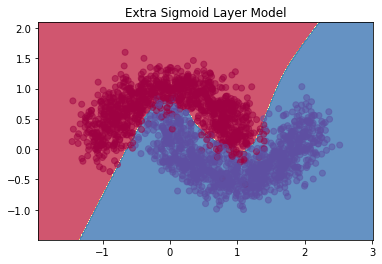

-------------Other Output Function-------------
------------- Elu Output Activation -------------
Training time: 9.5 sec
Test loss:     5.339936017990112
Test accuracy: 0.48833333293596903


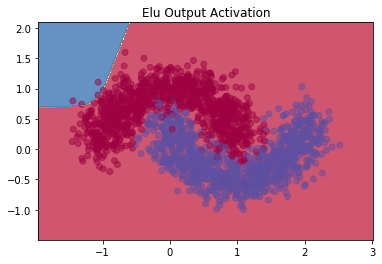

------------- Softplus Output Activation -------------
Training time: 9.8 sec
Test loss:     0.1139091714223226
Test accuracy: 0.9599999992052713


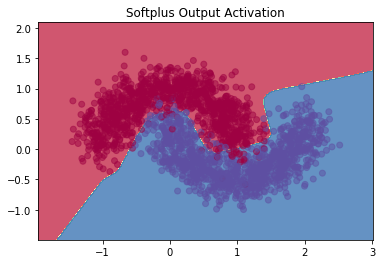

------------- Sigmoid Output Activation -------------
Training time: 8.1 sec
Test loss:     0.11890182827909787
Test accuracy: 0.9566666666666667


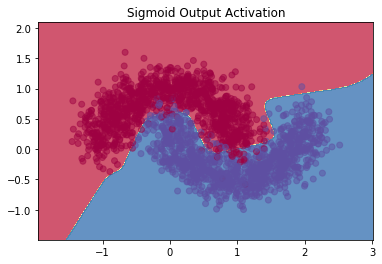

In [9]:
def TestModelByHyperparamters(TestName, OutputUnits, OutputActivation, NewLayers,Epochs):
    # Build Keras model 
    model = Sequential()
    if NewLayers!="null":
        for layer in NewLayers:
            model.add(layer)
    model.add(Dense(units=OutputUnits, activation=OutputActivation))

    optimizer = Adam(lr=0.1)
    model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])
    
    X, y = datasets.make_moons(n_samples=2000, noise=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    y_train_binary = to_categorical(y_train)
    y_test_binary  = to_categorical(y_test)

    assert y.ndim==1
    assert y_train_binary.ndim==2
    assert y_test_binary.ndim ==2

    # Train
    VERBOSE     = 0
    EPOCHS      = Epochs

    start = time()
    history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
    t = time()-start

    print("------------- " + TestName + " -------------")
    #print(history.history)
    score = model.evaluate(X_test, y_test_binary, verbose=0)

    print(f"Training time: {t:0.1f} sec")
    print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
    print(f"Test accuracy: {score[1]}")

    # Predict and plot decision boundary
    plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
    plt.title(TestName)
    plt.show()
    return


Layer1 = Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal")
Layer2 = Dense(units=16, activation="tanh", kernel_initializer="normal")
Layer3 = Dense(units=32, activation="tanh", kernel_initializer="normal")
Layer4 = Dense(units=8, activation="sigmoid", kernel_initializer="normal")
Layer5 = Dense(units=32, activation="sigmoid", kernel_initializer="normal")
LayerSig = Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal")
LayerMoreNeuronsTanh = Dense(input_dim=2, units=32, activation="tanh", kernel_initializer="normal")
LayerMoreNeuronsSig = Dense(input_dim=2, units=32, activation="sigmoid", kernel_initializer="normal")
LayerEvenMoreNeuronsTanh = Dense(input_dim=2, units=124, activation="tanh", kernel_initializer="normal")
LayerEvenMoreNeuronsSig = Dense(input_dim=2, units=124, activation="sigmoid", kernel_initializer="normal")

MoreNeuronsLayerTanh = [LayerMoreNeuronsTanh]
MoreNeuronsLayerSig = [LayerMoreNeuronsSig]
MoreEvenNeuronsLayerTanh = [LayerEvenMoreNeuronsTanh]
MoreEvenNeuronsLayerSig = [LayerEvenMoreNeuronsSig]
standardlayer = [Layer1]
extraTanhLayer = [Layer1, Layer2,Layer3]
TanhSigLayers =[Layer1,Layer4]
sigmoidLayers =[LayerSig,Layer5]


#TestModelByHyperparamters(TestName, OutputUnits, OutputActivation, NewLayers, Epochs)

#Pivot model
TestModelByHyperparamters("Original Layer Model", 2,"softmax", standardlayer, 35)

print("-------------More Epochs Test-------------")
TestModelByHyperparamters("Epochs 10", 2,"softmax", standardlayer, 10)
TestModelByHyperparamters("Epochs 50", 2,"softmax", standardlayer, 50)
TestModelByHyperparamters("Epochs 120", 2,"softmax", standardlayer, 120)

print("-------------More Neurons Test-------------")
#More Neurons Test
TestModelByHyperparamters("32 Neurons Tanh Layer Model", 2,"softmax", MoreNeuronsLayerTanh, 35)
TestModelByHyperparamters("32 Neurons Sigmoid Layer Model", 2,"softmax", MoreNeuronsLayerSig, 35)

TestModelByHyperparamters("124 Neurons Tanh Layer Model", 2,"softmax", MoreEvenNeuronsLayerTanh, 35)
TestModelByHyperparamters("124 Neurons Sigmoid Layer Model", 2,"softmax", MoreEvenNeuronsLayerSig, 35)


print("-------------More Layers Test-------------")
#NewLayers Test
TestModelByHyperparamters("Extra Tanh Layer Model", 2,"softmax", extraTanhLayer, 35)
TestModelByHyperparamters("Tanh and Sigmoid Layer  Model", 2,"softmax", TanhSigLayers, 35)
TestModelByHyperparamters("Extra Sigmoid Layer Model", 2,"softmax", sigmoidLayers, 35)

print("-------------Other Output Function-------------")
TestModelByHyperparamters("Elu Output Activation", 2,"elu", standardlayer, 35)
TestModelByHyperparamters("Softplus Output Activation", 2,"softplus", standardlayer, 35)
TestModelByHyperparamters("Sigmoid Output Activation", 2,"sigmoid", standardlayer, 35)



### Solution c Optimize the Keras Model

* increasing/decreasing the number of epochs,

I den øverste test kan det ses der ikke er nogen fast sammenhæng mellem Epochs og præcision af. Testen med 10 Epochs bliver mere præcis end den med 50 Epochs, mens testen med 120 Epochs bliver den mest præcise. Det neurale netværk bliver på virket for hver iteration og ændre sin decision boundry, i dette tilfælde bliver ydre punkterne meget påvirket som til tider kan giver et godt resultat. Havde modellen som skulle fittes været mere kompleks, så havde det måske været værd at bruge flere Epochs. Træningstiden bliver tydeligt påvirket af flere Epochs, hvilket giver god mening eftersom Epochs er det antal gange(iterationer) som modellen trænes. 

* adding more neurons per layer, 

Hvis man bruger tanh som tilpasning, så har flere neuroner en bedre påvirkning på accuracy, men man betaler i testloss. bruger man derimod sigmoid, så stabliserer accuracy sig omkring de 96 procent og forværre sig en lille smule i loss. Ved brug af flere neuroner, kan man opnå et bedre resultat, men det er begrænset, hvor meget man påvirker modellen. Derfor er denne parameter meget spændende at tjekke ift. fine tuning. Flere Neuroner har ikke en tydelig påvirkning på træningstiden.


* adding whole new layers,

At tilføje flere lag(Extra tanh layer model), var en meget ustabil teknik, decision boundry ændrede meget hurtigt karakter. Hvor en genkompilering af de andre modeller i new layers, så kan decision boundry tage nogle mere ualmindelige former. Man kan diskutere om dette eksempel er komplekst nok til at skulle bruge flere lag eller man kunne stabilerer den med flere neuroner eller flere epochs.  


* changing the activation functions in the layers,

I flere af modellerne er de forskellige activation functions blevet sammenlignet. Det vriker til at tanh er meget glad for at lave en tilpasning som er lineær, men efter undersøgelse med flere end 5 Epochs, så begynder den at tilpasse sin decision boundry til hvad en Sigmoid funktion vil. Sigmoid vil gerne lave en kurve og ved færre antal Epochs, kunne den bedre tilpasse sin model. Det blev dog hurtigt tydeligt at begge aktiverings funktioner kunne producere en god model til datasættet

* changing the output activation from `activation="softmax"` to something else,


